We will be using XGBoost Regression model to predict the price of house

We will be using R squared to check accuracy

In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_absolute_error


In [34]:
house_data = pd.read_csv("/content/BostonHousing.csv")
print(house_data)

        crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio       b  lstat  medv
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3  396.90   4.98  24.0
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8  396.90   9.14  21.6
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8  392.83   4.03  34.7
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7  394.63   2.94  33.4
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7  396.90   5.33  36.2
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...      ...     ...    ...   ...
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273     21.0  391.99   9.67  22.4
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273     21.0  396.90   9.08  20.6
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273     21.0  396.90   5.64  23.9


In [35]:
house_data.shape
house_data.rename(columns={'medv': 'price'}, inplace=True)
house_data.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         5
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
price      0
dtype: int64

In [36]:
X = house_data.drop(columns = 'price',axis = 1)
Y = house_data['price']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2, random_state=2)


Model Training and Testing


In [37]:
model = XGBRegressor()
model.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Training Data

In [38]:
train_prediction = model.predict(X_train)
print(train_prediction)

[23.098213  20.999493  20.100712  34.69146   13.908512  13.499188
 22.005543  15.206342  10.8988695 22.677683  13.802292   5.5992246
 29.79903   50.000896  34.881298  20.619646  23.372395  19.202538
 32.697285  19.604185  26.987984   8.400937  45.993626  21.712433
 27.08105   19.349197  19.29314   24.7933    22.61487   31.693779
 18.539114   8.702092  17.40409   23.699408  13.297645  10.494993
 12.669688  25.000593  19.698307  14.9110775 24.21232   25.000761
 14.900763  17.013046  15.597457  12.68823   24.503881  14.999328
 49.99955   17.532228  21.199259  32.010696  15.601823  22.893911
 19.322012  18.73874   23.292349  37.210262  30.105167  33.121197
 20.999691  49.985893  13.400765   5.009729  16.502712   8.40547
 28.691751  19.494135  20.596006  45.400337  39.80286   33.40684
 19.829916  33.40482   25.281872  49.998436  12.519731  17.429428
 18.605316  22.591347  50.00362   23.805405  23.30907   23.092073
 41.70726   16.111097  31.623669  36.082043   6.9961967 20.400877
 19.989061 

The above values are the prices predicted by x train

In [43]:
R_squared = r2_score(Y_train , train_prediction )
Mean_squared = mean_absolute_error(Y_train , train_prediction)
print("R_squared = ",R_squared)
print("Mean Absolute Error = ", Mean_squared)

R_squared =  0.9999974930039426
Mean Absolute Error =  0.0099853890957219


Testing Data

In [46]:
test_prediction = model.predict(X_test)
r_square_test = r2_score(Y_test,test_prediction)
Mean_squared_test = mean_absolute_error(Y_test , test_prediction)
print("R_squared = ",r_square_test)
print("Mean Absolute Error = ", Mean_squared_test)

R_squared =  0.9156404620793328
Mean Absolute Error =  1.9900942007700595


We're using Y_train and Y_test because they represent the actual prices of the houses. In a regression problem like this, Y_train and Y_test are the target variables, or the dependent variables, which we're trying to predict. X_train and X_test are the independent variables, or the features, used to make those predictions.

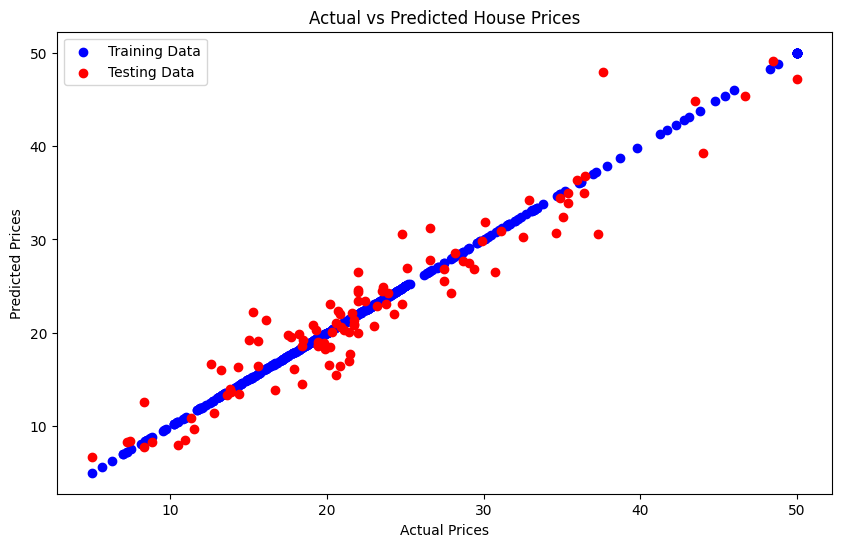

In [55]:
plt.figure(figsize=(10, 6))

# Scatter plot for training data
plt.scatter(Y_train, train_prediction, color='blue', label='Training Data')

# Scatter plot for testing data
plt.scatter(Y_test, test_prediction, color='red', label='Testing Data')


plt.title('Actual vs Predicted House Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.show()
